In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv('/content/drive/MyDrive/Deep_learning-datasets/UK_foods.csv',index_col='Unnamed: 0')

In [122]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [123]:
df2 = df.transpose()

In [124]:
df2

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


<Axes: >

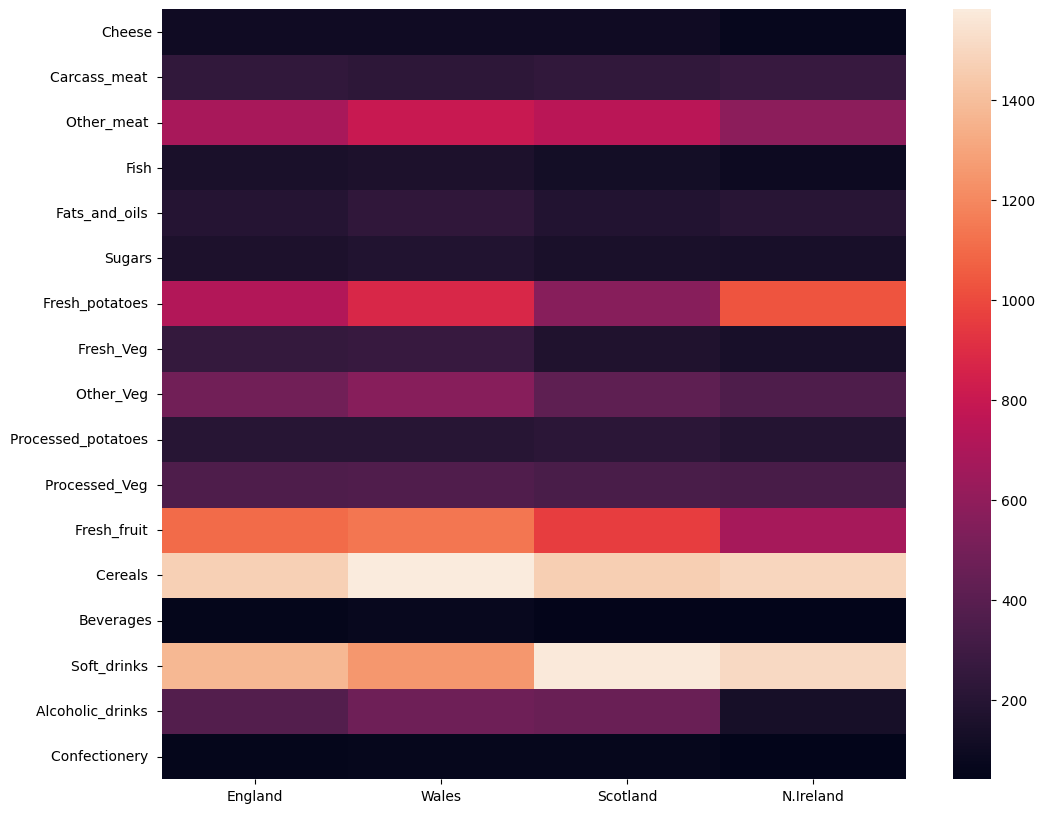

In [125]:
plt.figure(figsize=(12,10))
sns.heatmap(df)

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [127]:
encoder = Sequential()
encoder.add(Dense(8,activation='relu',input_shape=[17]))
encoder.add(Dense(4,activation='relu',input_shape=[8]))
encoder.add(Dense(2,activation='relu',input_shape=[4]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
decoder = Sequential()
decoder.add(Dense(4,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation='relu',input_shape=[4]))
decoder.add(Dense(17,activation='relu',input_shape=[8]))

In [129]:
autoencoder = Sequential([encoder,decoder])

In [130]:
autoencoder.compile(loss='mse',optimizer=SGD(learning_rate=0.7))

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler = MinMaxScaler()

In [133]:
scaled_data = scaler.fit_transform(df2.values)

In [134]:
scaled_data.shape

(4, 17)

In [135]:
scaled_data

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [136]:
autoencoder.fit(scaled_data,scaled_data,epochs=150)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step - loss: 0.4260
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4130
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3661
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3357
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3155
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3025
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2942
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2892
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2861
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2843
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2831
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2823
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2818
Epoch 14/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2814
Epoch 15/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2810
Epoch 16/150
1/1 ━

In [137]:
encoded_2dim = encoder.predict(scaled_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [138]:
encoded_2dim

array([[2.0137348 , 0.87186635],
       [3.4381828 , 1.9451646 ],
       [1.8320338 , 0.8009028 ],
       [0.        , 0.        ]], dtype=float32)

In [139]:
df2.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [140]:
results = pd.DataFrame(encoded_2dim,index=df2.index,columns=['C1','C2'])

In [141]:
results = results.reset_index()

In [142]:
results

,index,C1,C2
0,England,2.013735,0.871866
1,Wales,3.438183,1.945165
2,Scotland,1.832034,0.800903
3,N.Ireland,0.000000,0.000000


<Axes: xlabel='C1', ylabel='C2'>

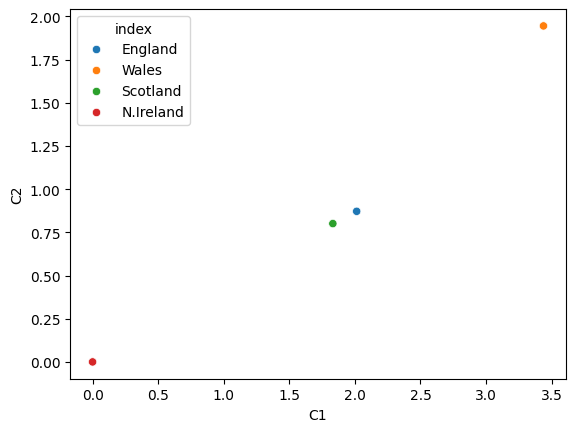

In [143]:
sns.scatterplot(data=results,x='C1',y='C2',hue='index')